In [1]:
# coding=utf-8
from scapy.all import *
import binascii
import struct
import time

import crcmod
import libnum

from scapy.layers.inet import IP, UDP
from scapy.layers.l2 import Ether

import numpy as np

plc_cube = []
hmi_cube = []

def packet_analysis(pkt):
    if TCP in pkt:
        #print(pkt[TCP].dport)
        #print(len(pkt[TCP].payload))
        if len(pkt[TCP].payload) > 6:
            d_time = float(str(pkt.time))
            #print(type(d_time))
            #print(dir(pkt[TCP]))
            #print(pkt.summary())
            #print(pkt.time)
            #print(binascii.hexlify(bytes(pkt[TCP].payload))[12:])
            #print(type(float(pkt.time)))
            if(pkt[TCP].dport == 502):
                #plc_cube.append([d_time,binascii.hexlify(bytes(pkt[TCP].payload))[12:]])
                plc_cube.append(d_time)
            else:
                #hmi_cube.append([d_time,binascii.hexlify(bytes(pkt[TCP].payload))[12:]])
                hmi_cube.append(d_time)


In [2]:
try:
    #print(ifaces)
    #sniff(iface="Realtek PCIe GbE Family Controller", prn=packet_analysis, filter="udp port 18507")
    sniff(offline='DataSet/modbus_arp_attack001.pcapng', prn=packet_analysis, store=0)
    plc_cube = np.asarray(plc_cube)
    hmi_cube = np.asarray(hmi_cube)
    print('Completed')

except Exception as sniff_dec_err:
    traceback.print_exc()
    print(str(sniff_dec_err))

Completed


In [3]:
print(hmi_cube.shape)
print(plc_cube.shape)

(243,)
(231,)


In [4]:
#print(hmi_cube)

In [5]:
#print(plc_cube)

In [6]:
fourier = np.fft.fft(hmi_cube)

In [7]:
timespan = hmi_cube[10] - hmi_cube[0]
print(timespan,'s')

2.0089900493621826 s


In [8]:
hmi_diff = np.diff(hmi_cube)

In [9]:
#print(hmi_diff)

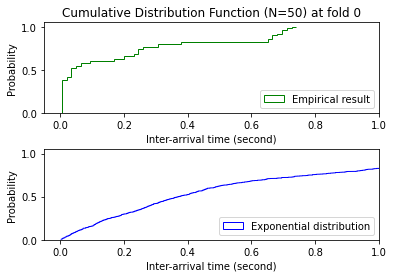

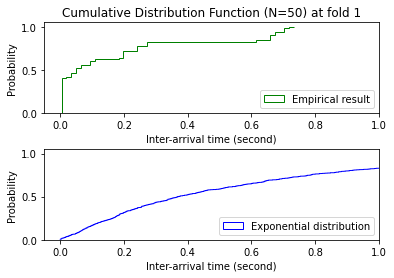

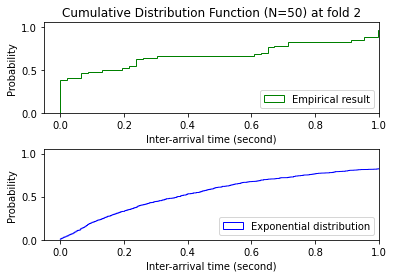

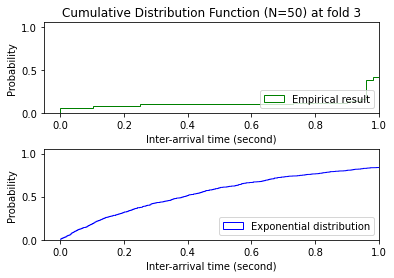

In [17]:

import numpy as np
import matplotlib.pyplot as plt

#fig1, ax = plt.subplots()
for k in range(4):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.subplots_adjust(hspace=0.4)

    #### First, plot the empirical result
    fold = k*50
    y = hmi_diff[fold:fold+50]
    n_bins = len(y)-1
    n, bins, patches = ax1.hist(y, n_bins, density=True, histtype='step',
              cumulative=True, label='Empirical result', color='g')
    # the following line is used to remove the last point
    patches[0].set_xy(patches[0].get_xy()[:-1])
    ax1.set_xlim(-0.05, 1.0)
    ax1.set_xlabel('Inter-arrival time (second)')
    ax1.set_ylabel('Probability')
    ax1.set_title('Cumulative Distribution Function (N='+ str(len(y)) +') at fold ' + str(k))
    ax1.legend(loc=4)

    #### Then plot the theoretical expontential distribution
    G = np.random.default_rng()
    y = G.exponential(scale=0.55, size=898)
    # Now, plot the cumulative distributioin function (CDF)
    n_bins = len(y)-1
    n, bins, patches = ax2.hist(y, n_bins, density=True, histtype='step',
              cumulative=True, label='Exponential distribution', color='b')
    # the following line is used to remove the last point
    patches[0].set_xy(patches[0].get_xy()[:-1])
    ax2.set_xlim(-0.05, 1.0)
    ax2.set_xlabel('Inter-arrival time (second)')
    ax2.set_ylabel('Probability')
    #ax2.set_title('Cumulative Distribution Function (N=100)')
    ax2.legend(loc=4)

plt.show()
#plt.savefig('./cdf.pdf')

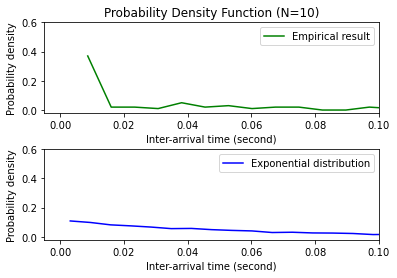

In [11]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.4)

#### First, plot the p.d.f. of our empirical result
y = hmi_diff[:100]
heights, bins = np.histogram(y, bins=100)
# do normalization
heights = heights/float(sum(heights))
binMids = bins[:-1]+np.diff(bins)/2.
ax1.plot(binMids, heights, label='Empirical result', color='g')
ax1.set_xlim(-0.005, 0.1)
ax1.set_ylim(-0.02, 0.6)
ax1.set_xlabel('Inter-arrival time (second)')
ax1.set_ylabel('Probability density')
ax1.set_title('Probability Density Function (N=10)')
ax1.legend(loc=1)

#### Now, plot the p.d.f. of exponential distribution
G = np.random.default_rng()
y = G.exponential(scale=0.055, size=9010)
heights, bins = np.histogram(y, bins=100)
# do normalization
heights = heights/float(sum(heights))
binMids = bins[:-1]+np.diff(bins)/2.
ax2.plot(binMids, heights, label='Exponential distribution', color='b')
ax2.set_xlim(-0.005, 0.1)
ax2.set_ylim(-0.02, 0.6)
ax2.set_xlabel('Inter-arrival time (second)')
ax2.set_ylabel('Probability density')
ax2.legend(loc=1)

plt.show()


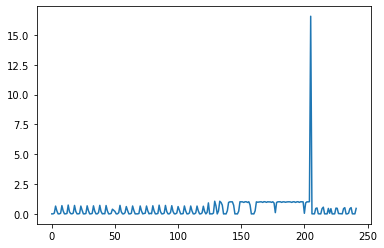

In [12]:
plt.plot(hmi_diff)
plt.show()

In [13]:
freqs = np.fft.fftfreq(len(hmi_diff))

In [14]:
for coef,freq in zip(fourier,freqs):
    if coef:
        print('{c:>6} * exp(2 pi i t * {f})'.format(c=coef,f=freq))

(392224020012.97314+0j) * exp(2 pi i t * 0.0)
(1923.7957404536949+4214.198479440408j) * exp(2 pi i t * 0.004132231404958678)
(51.65901511419478+2644.685982597376j) * exp(2 pi i t * 0.008264462809917356)
(-146.56112462405952+1581.2000917072774j) * exp(2 pi i t * 0.012396694214876033)
(-216.37228173098538+1115.4913280752755j) * exp(2 pi i t * 0.01652892561983471)
(-152.07992519753594+769.8877354178974j) * exp(2 pi i t * 0.02066115702479339)
(-78.2877787586858+606.8030801369691j) * exp(2 pi i t * 0.024793388429752067)
(4.947302286940577+524.9866426993756j) * exp(2 pi i t * 0.028925619834710745)
(24.49131547737143+534.0855123259465j) * exp(2 pi i t * 0.03305785123966942)
(-23.992754685867105+522.3861185775279j) * exp(2 pi i t * 0.0371900826446281)
(-81.83458566892548+469.85064535467524j) * exp(2 pi i t * 0.04132231404958678)
(-97.79682062838867+389.3460243868618j) * exp(2 pi i t * 0.045454545454545456)
(-94.72293958929626+324.19255565867473j) * exp(2 pi i t * 0.049586776859504134)
(-57.044